In [34]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

%matplotlib inline


## ━━━━━━━━❮Análise de Dados❯━━━━━━━━

In [35]:
#━━━━━━━━━━━━━━❮Data Config❯━━━━━━━━━━━━━━

df =pd.read_csv(r'C:\Users\pytho\Documents\GitHub\SynthAI\IA\Data\fraud_dataset_example.csv')
df.head(5)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
# df.columns

df =df[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]


df.head(5)

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [37]:
colunms ={'isFraud': 'fraude',
          'isFlaggedFraud': 'fraude_grande',
          'step' : 'tempo',
          'type': 'tipo',
          'amount': 'valor',
          'nameOrig': 'cliente',
          'oldbalanceOrg': 'saldo_antigo_cliente',
          'newbalanceOrig': 'novo_saldo_cliente',
          'nameDest': 'destinatario',
          'oldbalanceDest': 'saldo_antigo_destinatario',
          'newbalanceDest': 'novo_saldo_destinatario'}

df.rename(columns=colunms, inplace=True)
df.head(5)

,fraude,fraude_grande,tempo,tipo,valor,cliente,saldo_antigo_cliente,novo_saldo_cliente,destinatario,saldo_antigo_destinatario,novo_saldo_destinatario
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
fraude_grande,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_antigo_cliente,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_cliente,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_antigo_destinatario,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_destinatario,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [39]:
df.shape

(101613, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fraude                     101613 non-null  int64  
 1   fraude_grande              101613 non-null  int64  
 2   tempo                      101613 non-null  int64  
 3   tipo                       101613 non-null  object 
 4   valor                      101613 non-null  float64
 5   cliente                    101613 non-null  object 
 6   saldo_antigo_cliente       101613 non-null  float64
 7   novo_saldo_cliente         101613 non-null  float64
 8   destinatario               101613 non-null  object 
 9   saldo_antigo_destinatario  101613 non-null  float64
 10  novo_saldo_destinatario    101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [41]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [42]:
df.isnull().values.any()

False

In [43]:
# !pip install pandas-profiling==3.1.0
# !pip install ydata_profiling
# !pip uninstall numpy scipy
# !pip install numpy scipy
# !pip install ipywidgets




In [44]:



# ProfileReport(df)


In [45]:
# enconding, transformar variavel categorica em variavel numberica


# label_encoding = df['tipo'].astype('category').cat.codes # transforma as variaveis em numeros


# one_hot_encoding = pd.get_dummies(df['tipo'])  transforma as variaveis em n colunas binarias sendo n o numero de classes

df =pd.get_dummies(data =df, columns=['tipo'])


df =df.drop(columns=['cliente', 'destinatario'])
df.head(5)

,fraude,fraude_grande,tempo,valor,saldo_antigo_cliente,novo_saldo_cliente,saldo_antigo_destinatario,novo_saldo_destinatario,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False
1,0,0,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,False,True,False
2,1,0,1,181.00,181.0,0.00,0.0,0.0,False,False,False,False,True
3,1,0,1,181.00,181.0,0.00,21182.0,0.0,False,True,False,False,False
4,0,0,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False


In [ ]:
x =df.drop('fraude', axis=1)
y =df['fraude']

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:


lr =LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train, y_train)

y_pred =lr.predict(x_test)


0.998966687988978
0.08695652173913043
0.05
0.3333333333333333


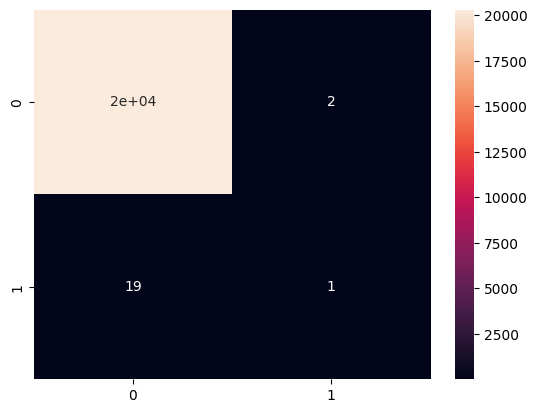

In [ ]:
# acuracia, f1, recall, precision

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

# graficos, matriz de confusao

cm =confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.show()

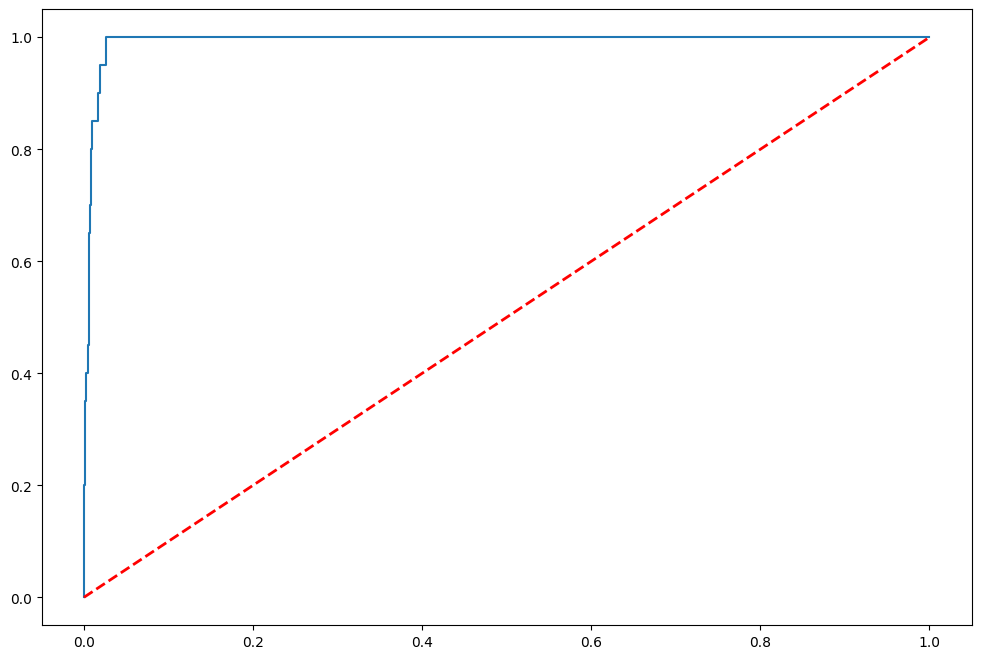

In [ ]:
y_pred_proba =lr.predict_proba(x_test)[::,1]

fpr, tpr, _ =metrics.roc_curve(y_test, y_pred_proba)

auc =metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] =(12, 8)


plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.plot([0, 1], [0, 1], color ='red', lw =2, linestyle ='--')

In [ ]:
# !pip install -U imbalanced-learn




sm = SMOTE(random_state=42)

In [ ]:
x =df.drop('fraude', axis=1)
y =df['fraude']


x_resampled, y_resampled =sm.fit_resample(x, y)

In [ ]:
df_balanced = pd.concat([x_resampled, y_resampled], axis=1)

df_balanced.head(5)

,fraude_grande,tempo,valor,saldo_antigo_cliente,novo_saldo_cliente,saldo_antigo_destinatario,novo_saldo_destinatario,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER,fraude
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,False,True,False,0
2,0,1,181.00,181.0,0.00,0.0,0.0,False,False,False,False,True,1
3,0,1,181.00,181.0,0.00,21182.0,0.0,False,True,False,False,False,1
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False,0


In [ ]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [ ]:
x = df_balanced.iloc[:, 1].values

y = df_balanced.iloc[:, 0].values

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separação dos dados em features e target
X = df.drop('fraude', axis=1)
y = df['fraude']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicação do SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificação das classes em y_train após reamostragem
print(np.unique(y_train_resampled))


[0 1]


C:\Users\pytho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9658181341031361
F1 Score: 0.051001821493624776
Recall: 0.8
Precision: 0.02634054562558796


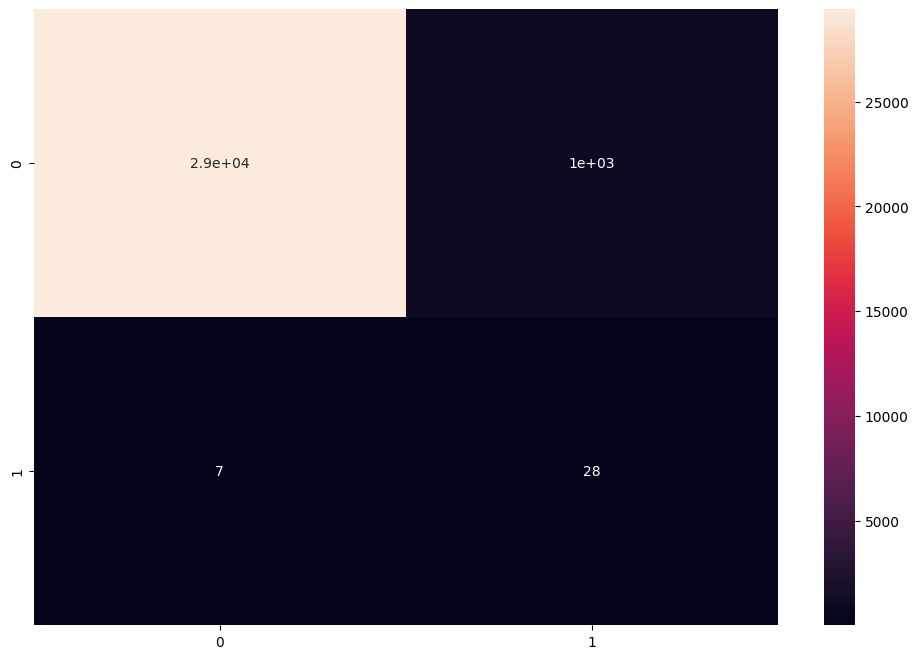

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Instanciar o modelo
lr = LogisticRegression()

# Treinar o modelo
lr.fit(X_train_resampled, y_train_resampled)

# Previsões com o conjunto de teste
y_pred = lr.predict(X_test)

# Avaliação do modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
